In [1]:
# Install the library into this environment if you haven't already
# !pip install daesim-preprocess

In [2]:
from DAESIM_preprocess.ozwald_8day import ozwald_8day
from DAESIM_preprocess.ozwald_daily import ozwald_daily
from DAESIM_preprocess.silo_daily import silo_daily

from DAESIM_preprocess.daesim_forcing import daesim_forcing

# Basic Example

In [3]:
# Example variables
lat = -34.3890427
lon=148.469499
buffer = 0.01  # Degrees in each direction (so ~2kmx2km)

start_year = 2020
end_year = 2021

stub = 'TEST'
outdir = 'outdir'
tmpdir = 'tmpdir'

import os
if not os.path.exists(outdir):
    os.mkdir(outdir)
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)

Starting ozwald_daily
Downloaded tmpdir/TEST_Uavg_2020.nc
Downloaded tmpdir/TEST_Uavg_2021.nc
Downloaded tmpdir/TEST_VPeff_2020.nc
Downloaded tmpdir/TEST_VPeff_2021.nc
Saved: outdir/TEST_ozwald_daily_Uavg.nc
Saved: outdir/TEST_ozwald_daily_Uavg.png
Starting ozwald_daily
Downloaded tmpdir/TEST_Tmax_2020.nc
Downloaded tmpdir/TEST_Tmax_2021.nc
Downloaded tmpdir/TEST_Tmin_2020.nc
Downloaded tmpdir/TEST_Tmin_2021.nc
Saved: outdir/TEST_ozwald_daily_Tmax.nc
Saved: outdir/TEST_ozwald_daily_Tmax.png
Starting ozwald_daily
Downloaded tmpdir/TEST_Pg_2020.nc
Downloaded tmpdir/TEST_Pg_2021.nc
Saved: outdir/TEST_ozwald_daily_Pg.nc
Saved: outdir/TEST_ozwald_daily_Pg.png
Starting ozwald_8day
Downloaded tmpdir/TEST_Ssoil_2020.nc
Downloaded tmpdir/TEST_Ssoil_2021.nc
Saved: outdir/TEST_ozwald_8day.nc
Saved: outdir/TEST_ozwald_8day.png
Starting silo_daily for stub TEST
Saved: outdir/TEST_silo_daily.nc
Saved: outdir/TEST_silo_daily.png
CPU times: user 3.87 s, sys: 421 ms, total: 4.29 s
Wall time: 25.2 s


<xarray.Dataset> Size: 12kB
Dimensions:    (time: 731, lat: 1, lon: 1)
Coordinates:
  * lat        (lat) float64 8B -34.4
  * lon        (lon) float64 8B 148.4
  * time       (time) datetime64[ns] 6kB 2020-01-01 2020-01-02 ... 2021-12-31
Data variables:
    radiation  (time, lat, lon) float64 6kB 26.5 29.0 30.2 ... 31.2 30.1 31.0
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    metadata_url:             http://qldspatial.information.qld.gov.au/catalo...
    reference:                Jeffrey, S.J., Carter, J.O., Moodie, K.B.A. and...
    disclaimer:               1. The user accepts all responsibility and risk...
    raster_source:            Bureau of Meteorology. Modified by the Queensla...
    NCO:                      netCDF Operators version 4.9.1 (Homepage = http...
    raster_source_additions:  Gridded surface was created by interpolating ob...

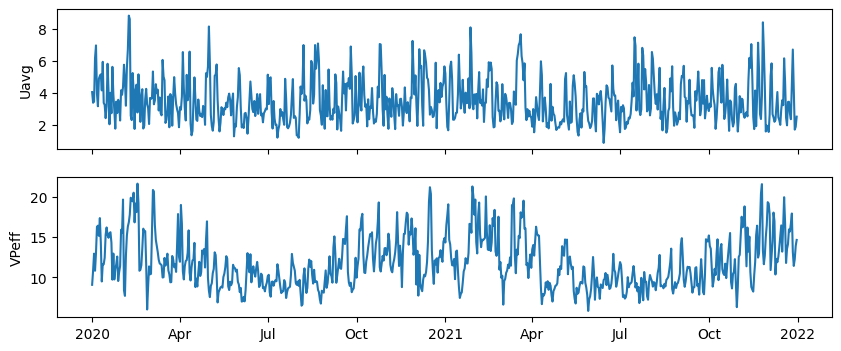

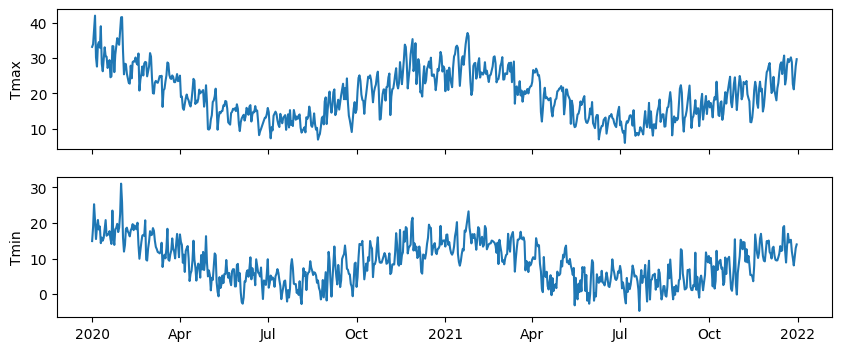

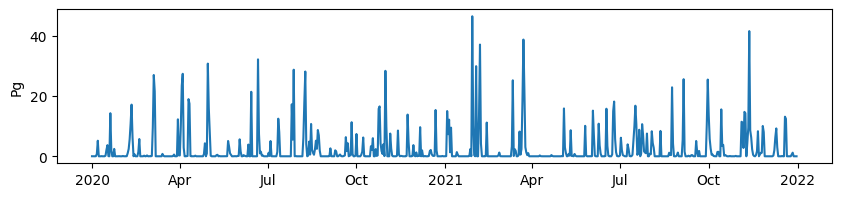

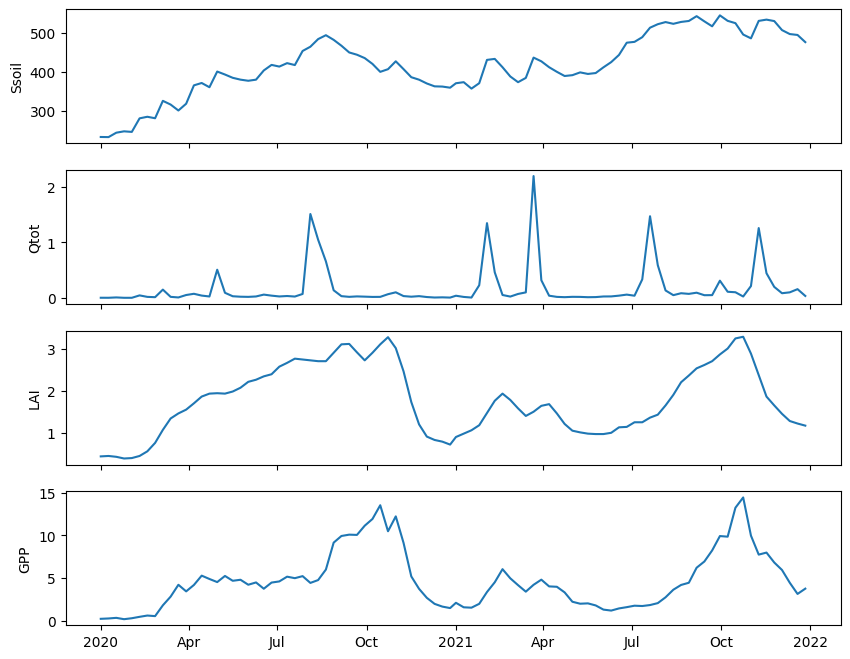

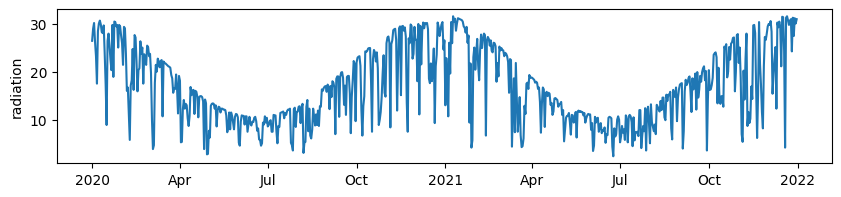

In [4]:
%%time
# Need to run ozwald_daily.py, ozwald_8day.py & silo_daily.py with the relevant variables before running daesim_forcing.py
ozwald_daily(["Uavg", "VPeff"], lat, lon, buffer, start_year, end_year, outdir, stub, tmpdir)
ozwald_daily(["Tmax", "Tmin"], lat, lon, buffer, start_year, end_year, outdir, stub, tmpdir)
ozwald_daily(["Pg"], lat, lon, buffer, start_year, end_year, outdir, stub, tmpdir)
ozwald_8day(["Ssoil", "Qtot", "LAI", "GPP"], lat, lon, buffer, start_year, end_year, outdir, stub, tmpdir)
silo_daily(['radiation'], lat, lon, buffer, start_year, end_year, outdir, stub, tmpdir)

In [5]:
# The main function
df = daesim_forcing(outdir, stub)
df

Saved outdir/TEST_DAESim_forcing.csv


,Precipitation,Runoff,Minimum temperature,Maximum temperature,Soil moisture,Vegetation growth,Vegetation leaf area,VPeff,Uavg,SRAD
date,,,,,,,,,,
2020-01-01,0.014016,0.001914,14.92,33.24,233.884094,0.229095,0.44,9.090172,4.063935,26.5
2020-01-02,0.000000,NaN,18.86,34.01,NaN,NaN,NaN,10.857118,3.398083,29.0
2020-01-03,0.000000,NaN,25.26,37.94,NaN,NaN,NaN,12.947279,3.471961,30.2
2020-01-04,0.000000,NaN,20.72,42.12,NaN,NaN,NaN,10.831703,6.183758,26.3
2020-01-05,0.028087,NaN,15.49,30.25,NaN,NaN,NaN,13.043198,6.981755,23.3
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1.192979,0.034457,10.18,22.63,476.399231,3.759136,1.17,13.149976,6.723623,31.3
2021-12-28,0.000000,NaN,8.09,21.17,NaN,NaN,NaN,11.430183,4.280005,27.5
2021-12-29,0.000263,NaN,10.44,24.65,NaN,NaN,NaN,12.260736,1.717390,31.2
